## Resultados

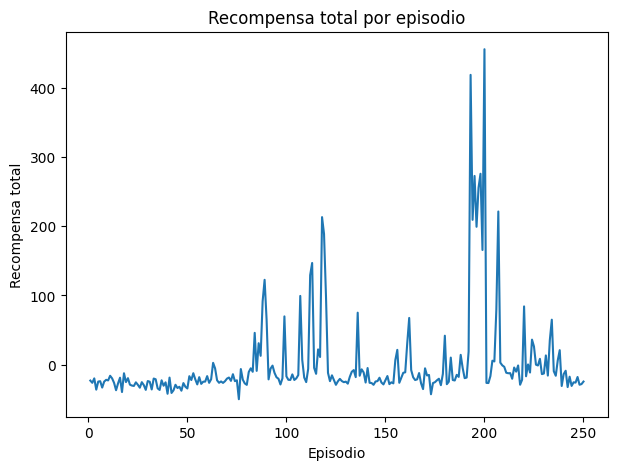

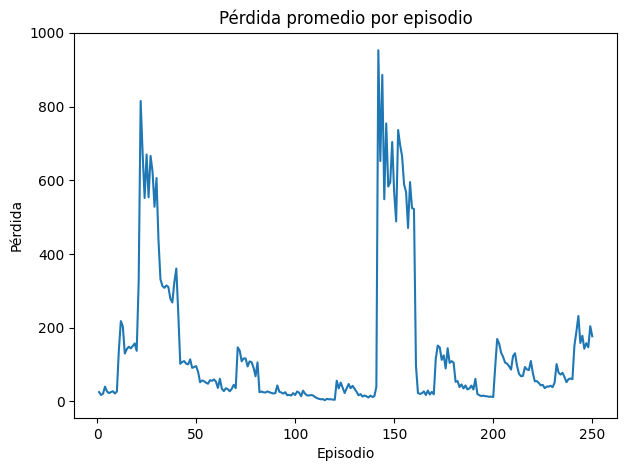

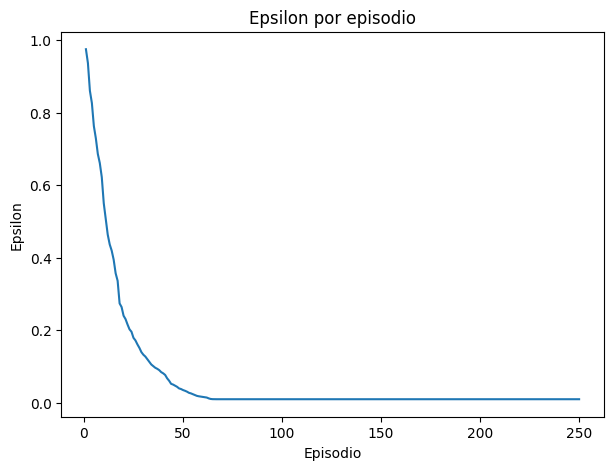

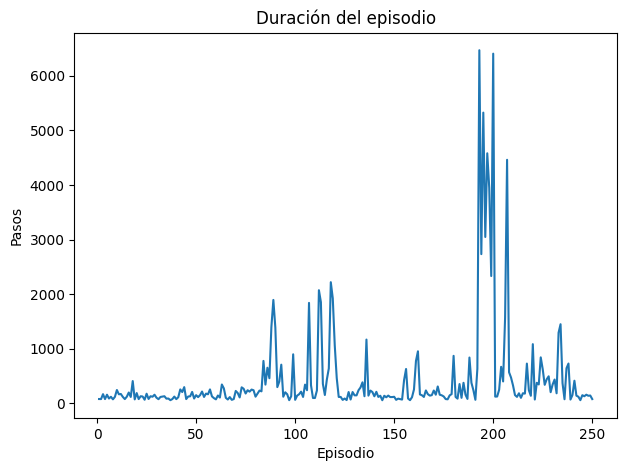

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV con las métricas
df = pd.read_csv('history/v5 - inicio random (facil)/metrics.csv')

# Extraer las columnas para cada métrica
episode_losses = df['loss']
episode_rewards = df['reward']
episode_epsilons = df['epsilon']
episode_lengths = df['length']

# Obtener el número de episodios
episodes = range(1, len(episode_rewards) + 1)

# Graficar las métricas individualmente

# Recompensa total por episodio
plt.figure(figsize=(7,5))
plt.plot(episodes, episode_rewards)
plt.title('Recompensa total por episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.show()

# Pérdida promedio por episodio
plt.figure(figsize=(7,5))
plt.plot(episodes, episode_losses)
plt.title('Pérdida promedio por episodio')
plt.xlabel('Episodio')
plt.ylabel('Pérdida')
plt.show()

# Epsilon por episodio
plt.figure(figsize=(7,5))
plt.plot(episodes, episode_epsilons)
plt.title('Epsilon por episodio')
plt.xlabel('Episodio')
plt.ylabel('Epsilon')
plt.show()

# Duración del episodio
plt.figure(figsize=(7,5))
plt.plot(episodes, episode_lengths)
plt.title('Duración del episodio')
plt.xlabel('Episodio')
plt.ylabel('Pasos')
plt.show()


pygame 2.6.1 (SDL 2.28.4, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\Pablo Zamora\AppData\Local\Temp\ipykernel_33432\3565321651.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  agent.model.load_state_dict(torch.load('history/v5 -

Valores SHAP para no hacer nada


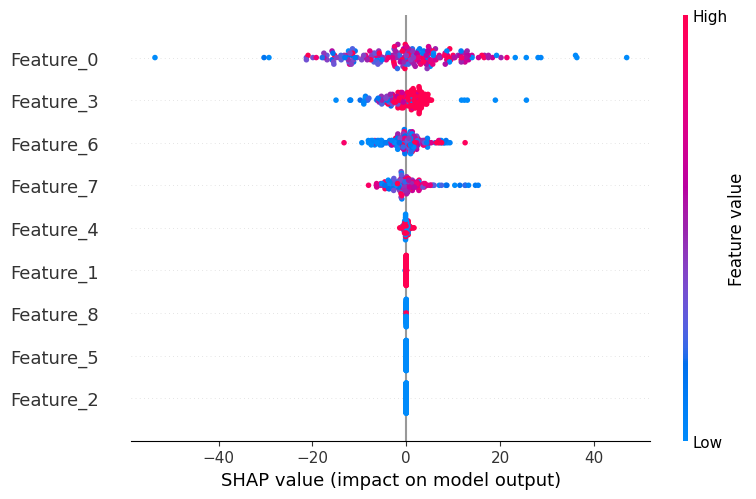

Valores SHAP para saltar


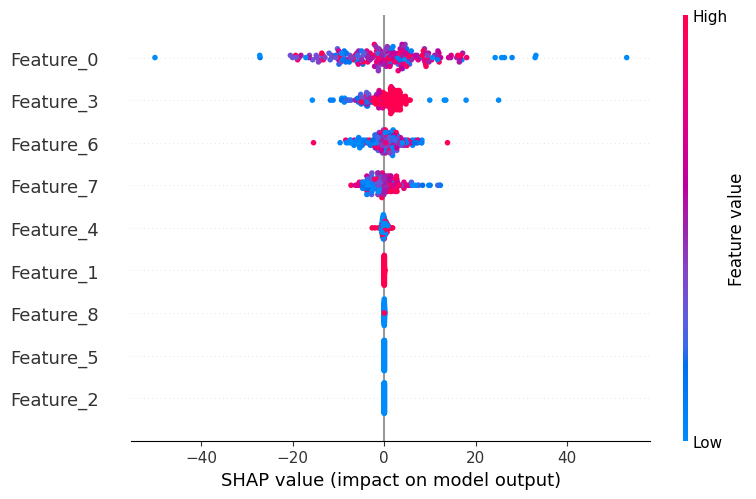

Valores SHAP para agacharse


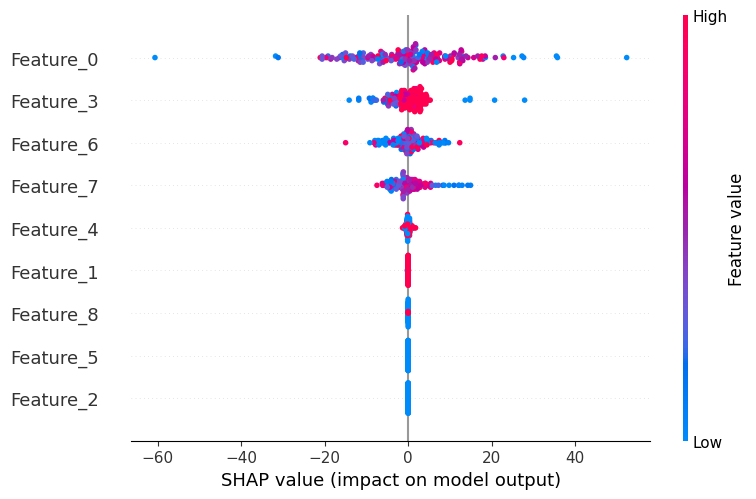

: 

In [ ]:
import shap
import torch
import random
import numpy as np
from dinoGame import DinoGame, DQNAgent

# Instanciar el entorno
env = DinoGame()

# 1. Cargar el modelo guardado
state_size = 9
action_size = 3
agent = DQNAgent(state_size, action_size)
agent.model.load_state_dict(torch.load('history/v5 - inicio random (facil)/models/best_dino_model_ep_117_reward_213_score_180.pth'))
agent.model.eval()  # Poner el modelo en modo evaluación

# 2. Crear un conjunto de datos representativo de estados
# Simulando algunos estados aleatorios del entorno DinoGame
sample_states = []
for _ in range(100):  # Obtener 100 ejemplos de estados
    state = env.reset()
    done = False
    while not done:
        action = random.randint(0, action_size - 1)
        next_state, _, done = env.step(action)
        sample_states.append(state)
        state = next_state
sample_states = torch.FloatTensor(sample_states[:200])  # Convertir a tensor y limitar a 100 estados

# 3. Configurar SHAP DeepExplainer con el modelo cargado
explainer = shap.GradientExplainer(agent.model, sample_states)

# 4. Calcular los valores SHAP
shap_values = explainer.shap_values(sample_states)

# 5. Reorganizar los valores SHAP por acción
# shap_values es una lista de matrices (una por estado); cada matriz tiene dimensiones (12, 3).
# Extraer cada columna para agrupar por acción.
shap_values_by_action = [np.array([state[:, i] for state in shap_values]) for i in range(action_size)]

# 6. Visualizar los valores SHAP para cada acción
feature_names = [f'Feature_{i}' for i in range(state_size)]
for i in range(action_size):
    action = 'no hacer nada' if i == 0 else 'saltar' if i == 1 else 'agacharse'
    print(f"Valores SHAP para {action}")
    shap.summary_plot(shap_values_by_action[i], sample_states.numpy(), feature_names=feature_names)
